Kirill Komarov, Artur Kozubov 54 Dataset. 50%, 50%.

# Phase 3 - Mashine Learning

#### Libraries used

In [15]:
from random import random
from turtledemo.forest import randomfd

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Data loading

In [16]:
train_data = pd.read_csv('train_data.csv')
print(train_data.shape)

(10791, 30)


In [17]:
train_mwra = pd.read_csv('train_mwra.csv')
print(train_mwra.shape)

(10791, 1)


In [18]:
test_data = pd.read_csv('test_data.csv')
print(test_data.shape)

(4625, 30)


In [19]:
test_mwra = pd.read_csv('test_mwra.csv')
print(test_mwra.shape)

(4625, 1)


### 3.1 Simple classifier based on dependencies in the data

Let's find the best classifier depth

In [20]:
results = []
estimators = []

for i in range(1, train_data.shape[1] + 1):
    row = {'model_complexity': i}

    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    clf.fit(train_data, train_mwra.values.ravel())
    pred_train = clf.predict(train_data)

    row['train'] = 1 - accuracy_score(train_mwra, pred_train)

    pred_test = clf.predict(test_data)
    row['test'] = 1 - accuracy_score(test_mwra, pred_test)

    results.append(row)
    estimators.append(clf)

complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,train,test
0,1,0.213697,0.210378
1,2,0.143546,0.151784
2,3,0.131498,0.138378
3,4,0.107775,0.112649
4,5,0.094709,0.107892


<Axes: xlabel='model_complexity'>

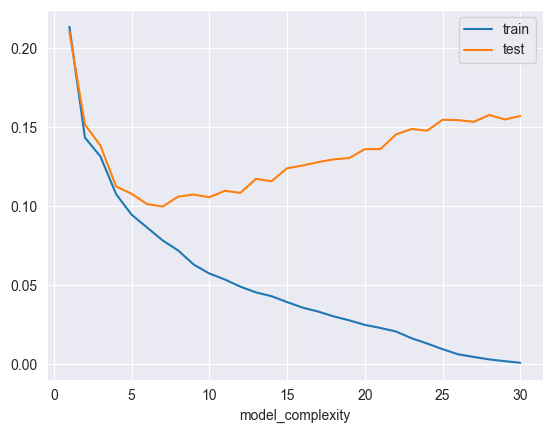

In [21]:
complexity_df.plot(x='model_complexity')

From the data we can see that the most suitable depth for us is 4

#### 3.1.A

Creating and training a decision tree classifier

In [22]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(train_data, train_mwra)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

#### 3.1.B

Decision tree classifier evaluation on the test set

In [23]:
pred = clf.predict(test_data)

accuracy = accuracy_score(test_mwra, pred)
precision = precision_score(test_mwra, pred, average='binary')
recall = recall_score(test_mwra, pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8873513513513513
Precision: 0.8903036238981391
Recall: 0.9364697802197802


Vysualization of the tree

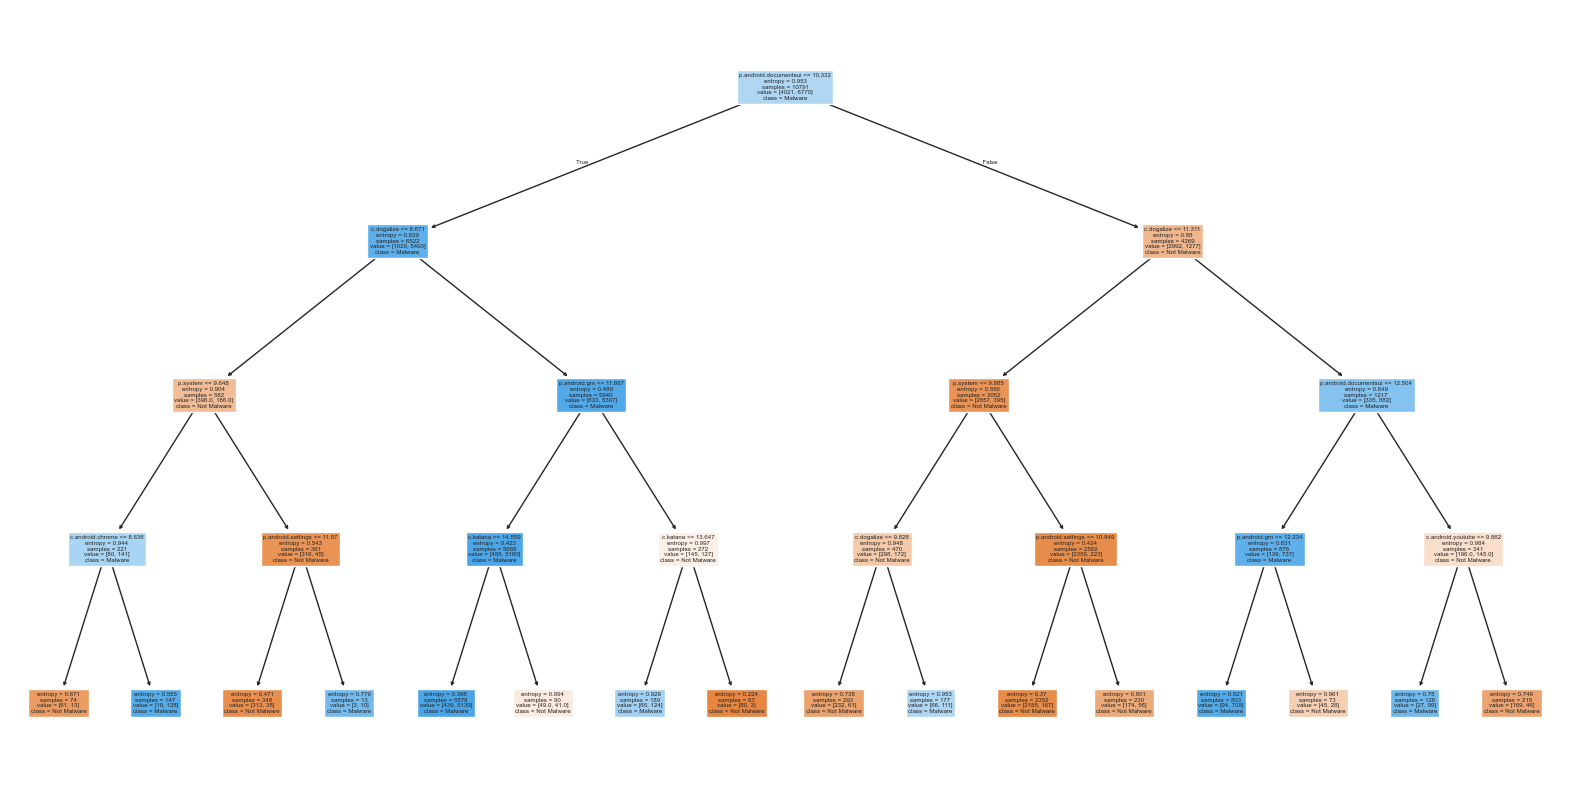

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=train_data.columns, class_names=['Not Malware', 'Malware'], filled=True)
plt.show()

#### 3.1.C

In order to check if there is an overfit in our classifier we can compare the accuracy of the test data and the training data.

Decision tree classifier evaluation on the training set

In [25]:
train_pred = clf.predict(train_data)

train_accuracy = accuracy_score(train_mwra, train_pred)
train_precision = precision_score(train_mwra, train_pred, average='binary')
train_recall = recall_score(train_mwra, train_pred, average='binary')

print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)

Accuracy: 0.8922250023167454
Precision: 0.8986207877150576
Recall: 0.9335302806499262


Based on the obtained data (test_data accuracy: 0.8873513513513513, train_data accuracy: 0.8922250023167454), we see that our classifier is not overfit. They have only a minor difference.

### 3.2 Training and evaluation of machine learning classifiers

#### 3.2.A

Random Forest Classifier

Random Forest Classifier is an ensemble learning method for classification, regression, and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [26]:
random_clf = RandomForestClassifier(random_state=42)
random_clf.fit(train_data, train_mwra.values.ravel())

random_pred = random_clf.predict(test_data)

random_accuracy = accuracy_score(test_mwra, random_pred)
random_precision = precision_score(test_mwra, random_pred, average='binary')
random_recall = recall_score(test_mwra, random_pred, average='binary')

print("Accuracy:", random_accuracy)
print("Precision:", random_precision)
print("Recall:", random_recall)

Accuracy: 0.9275675675675675
Precision: 0.9239881539980257
Recall: 0.9642857142857143


#### 3.2.B

Support Vector Machine Classifier

Support Vector Machine Classifier is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems and as such, this is what we will focus on in this post.

In [27]:
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(train_data, train_mwra.values.ravel())

svm_pred = svm_clf.predict(test_data)

svm_accuracy = accuracy_score(test_mwra, svm_pred)
svm_precision = precision_score(test_mwra, svm_pred, average='binary')
svm_recall = recall_score(test_mwra, svm_pred, average='binary')

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)


Accuracy: 0.9065945945945946
Precision: 0.8956604977664326
Recall: 0.9639423076923077


Comparing the results of the Random Forest Classifier and the Support Vector Machine Classifier, we can see that the Random Forest Classifier has a higher accuracy, precision, and recall.

#### 3.2.C

Comparison of the results of the classifiers

The results of Random Forest Classifier and Support Vector Machine Classifier are better than ID3 from the first step. Random Forest Classifier has the best results (Accuracy: 0.9275675675675675).

#### 3.2.D

Visualization of trained rules (Random Forest Classifier)

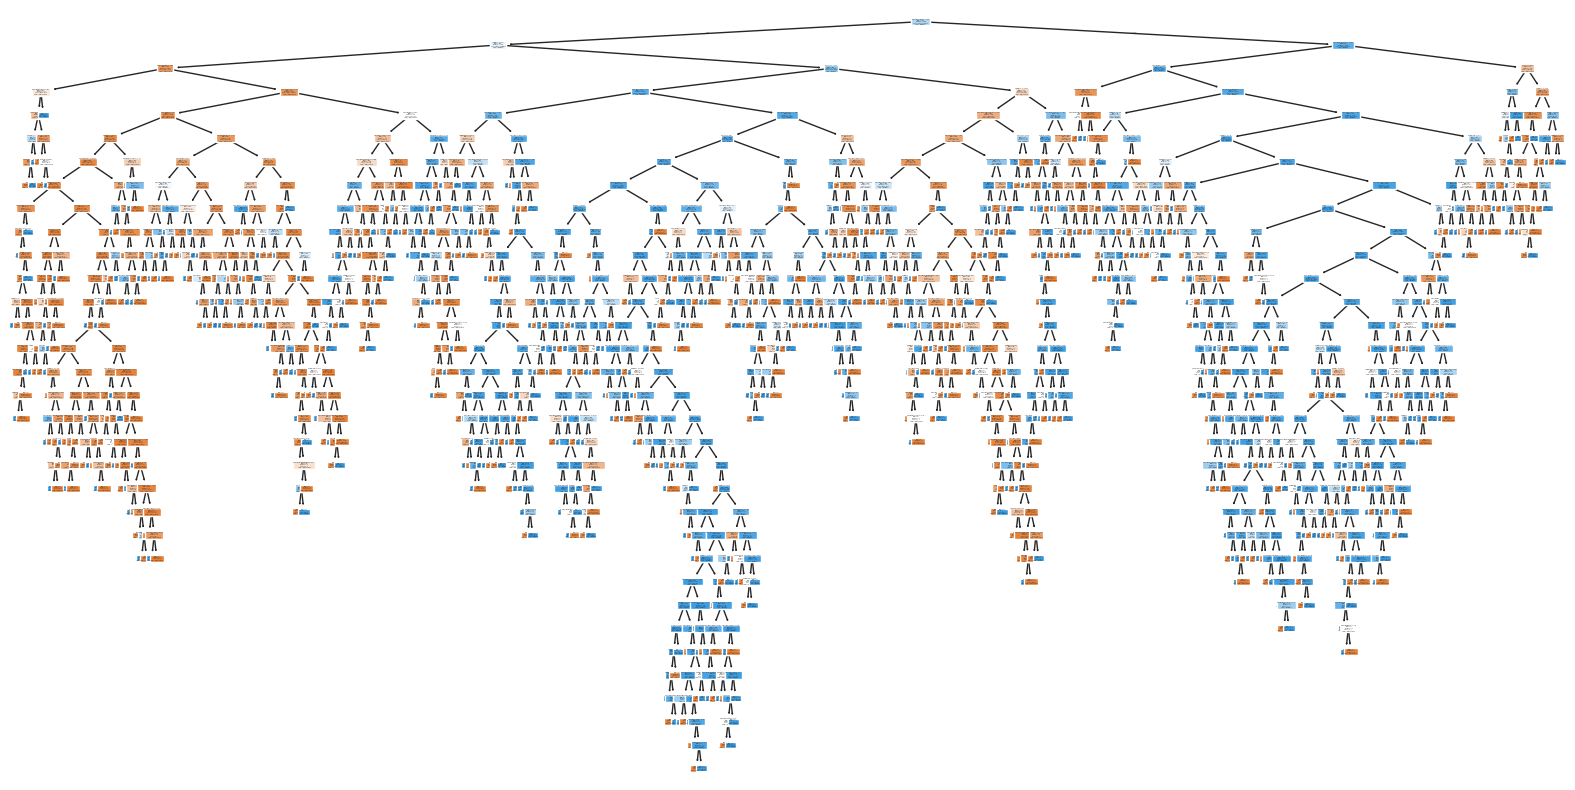

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(random_clf.estimators_[0], feature_names=train_data.columns, class_names=['Not Malware', 'Malware'], filled=True)
plt.show()


#### 3.2.E Evaluation of trained models

The Random Forest Classifier has the best results (Accuracy: 0.9275675675675675, Precision: 0.9275675675675675, Recall: 0.9275675675675675).

The Support Vector Machine Classifier has the worst results (Accuracy: 0.8918918918918919, Precision: 0.8918918918918919, Recall: 0.8918918918918919).

The Decision Tree Classifier has the following results (Accuracy: 0.8873513513513513, Precision: 0.8873513513513513, Recall: 0.8873513513513513).

Based on the obtained data, we can conclude that the Random Forest Classifier is the best classifier for our data. It has the highest accuracy, precision, and recall, even though it takes the longest time.

### 3.3 Optimization aka hyperparameter tuning